In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Getting Random Lats and Longs to Use

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-61.52072848842855, 111.98331850197576),
 (87.4125214827049, 164.12919414860772),
 (-10.016978786367218, -82.97633549550964),
 (-86.26791099070346, 66.98112921640788),
 (12.999392850276223, 172.62021810643137),
 (-57.000653123071345, 3.381179357907257),
 (-21.15905452243925, 144.3400138482554),
 (38.45966832484831, 58.37809514211165),
 (25.122351163307087, -23.402588225253936),
 (-83.44591092008774, -28.34658236264056),
 (43.10224854568571, -25.399229956491666),
 (-42.39198001333228, 0.8614088864817688),
 (-70.03369141006554, 12.353635933684615),
 (33.65422630727507, -18.596240177451847),
 (5.308057244820205, 176.3876622300869),
 (-33.31374842517325, 138.14075280326512),
 (-23.490358941332673, 65.1351209916491),
 (61.537585238461645, -125.76194851272811),
 (22.9124213792891, 61.224242150453335),
 (-21.35870530614166, 111.55212586231409),
 (-32.807936874678035, 84.60164418093473),
 (23.954505792721505, 74.1024534752691),
 (-22.898892321598282, 132.64556549348703),
 (-68.11116837223018

# Getting the Closest City Using Lats and Longs

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

521

# Retrieving Weather Data using List of Cities using enumerate

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# find out what verion we are using to get requests
#requests.__version__

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.

city_data = []


# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
total_record_count = 0

# Loop through all the cities in the list.
for i, city in enumerate(cities):
   
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
    
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create URL for each each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record counts.
    record_count += 1
    total_record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Append data to city_data 
        city_data.append({"City": city.title(),
                          "Lat": city_weather["coord"]["lat"],
                          "Lng": city_weather["coord"]["lon"],
                          "Max Temp": city_weather["main"]["temp_max"],
                          "Humidity": city_weather["main"]["humidity"],
                          "Cloudiness": city_weather["clouds"]["all"], 
                          "Wind Speed": city_weather["wind"]["speed"],
                          "Country": city_weather["sys"]["country"], 
                          "Date": datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(f"Records found: {total_record_count}.")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | pevek
Processing Record 3 of Set 1 | chicama
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | charters towers
Processing Record 8 of Set 1 | buzmeyin
Processing Record 9 of Set 1 | los llanos de aridane
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | praia da vitoria
Processing Record 12 of Set 1 | saldanha
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | port pirie
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | norman wells
Processing Record 18 of Set 1 | sur
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | salumbar
Processing Record 21 of Set 1 | alice springs
Processing Record

Processing Record 39 of Set 4 | port elizabeth
Processing Record 40 of Set 4 | yulara
Processing Record 41 of Set 4 | sakaiminato
Processing Record 42 of Set 4 | mackay
Processing Record 43 of Set 4 | skagastrond
City not found. Skipping...
Processing Record 44 of Set 4 | zhigalovo
Processing Record 45 of Set 4 | moses lake
Processing Record 46 of Set 4 | lagoa
Processing Record 47 of Set 4 | kalmar
Processing Record 48 of Set 4 | sistranda
Processing Record 49 of Set 4 | kloulklubed
Processing Record 50 of Set 4 | svetlogorsk
Processing Record 1 of Set 5 | steamboat springs
Processing Record 2 of Set 5 | upernavik
Processing Record 3 of Set 5 | koslan
Processing Record 4 of Set 5 | lipetsk
Processing Record 5 of Set 5 | yaan
Processing Record 6 of Set 5 | hovd
Processing Record 7 of Set 5 | nivala
Processing Record 8 of Set 5 | santa isabel do rio negro
Processing Record 9 of Set 5 | salalah
Processing Record 10 of Set 5 | jiexiu
Processing Record 11 of Set 5 | kenai
Processing Record

Processing Record 24 of Set 8 | champerico
Processing Record 25 of Set 8 | gao
Processing Record 26 of Set 8 | talnakh
Processing Record 27 of Set 8 | gopalpur
Processing Record 28 of Set 8 | thinadhoo
Processing Record 29 of Set 8 | cayenne
Processing Record 30 of Set 8 | beringovskiy
Processing Record 31 of Set 8 | kawalu
Processing Record 32 of Set 8 | ugoofaaru
Processing Record 33 of Set 8 | novyy svit
Processing Record 34 of Set 8 | itoman
Processing Record 35 of Set 8 | deshna
City not found. Skipping...
Processing Record 36 of Set 8 | vilhena
Processing Record 37 of Set 8 | ponta delgada
Processing Record 38 of Set 8 | adrar
Processing Record 39 of Set 8 | mundo nuevo
Processing Record 40 of Set 8 | lolua
City not found. Skipping...
Processing Record 41 of Set 8 | malwan
City not found. Skipping...
Processing Record 42 of Set 8 | fenoarivo
Processing Record 43 of Set 8 | payo
Processing Record 44 of Set 8 | darhan
Processing Record 45 of Set 8 | namibe
Processing Record 46 of S

# City Data List to DataFrame

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,29.26,63,4,1.01,US,2021-11-24 00:20:24
1,Pevek,69.7008,170.3133,-19.84,98,88,3.42,RU,2021-11-24 00:22:57
2,Chicama,-7.8447,-79.1469,63.14,76,46,7.58,PE,2021-11-24 00:22:57
3,Butaritari,3.0707,172.7902,82.13,71,100,14.83,KI,2021-11-24 00:22:57
4,Cape Town,-33.9258,18.4232,65.12,57,0,21.85,ZA,2021-11-24 00:20:47
5,Charters Towers,-20.1000,146.2667,89.89,44,89,18.23,AU,2021-11-24 00:22:58
6,Buzmeyin,38.0507,58.2056,44.33,76,40,2.30,TM,2021-11-24 00:22:58
7,Los Llanos De Aridane,28.6585,-17.9182,64.15,81,0,1.99,ES,2021-11-24 00:21:21
8,Ushuaia,-54.8000,-68.3000,44.26,70,75,11.50,AR,2021-11-24 00:21:34
9,Praia Da Vitoria,38.7333,-27.0667,64.76,100,75,21.14,PT,2021-11-24 00:22:59


In [12]:
# Reorder Columns: City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

#Assign a new or the same DataFrame with new column order:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-11-24 00:20:24,42.6001,-73.9662,29.26,63,4,1.01
1,Pevek,RU,2021-11-24 00:22:57,69.7008,170.3133,-19.84,98,88,3.42
2,Chicama,PE,2021-11-24 00:22:57,-7.8447,-79.1469,63.14,76,46,7.58
3,Butaritari,KI,2021-11-24 00:22:57,3.0707,172.7902,82.13,71,100,14.83
4,Cape Town,ZA,2021-11-24 00:20:47,-33.9258,18.4232,65.12,57,0,21.85
...,...,...,...,...,...,...,...,...,...
468,Awjilah,LY,2021-11-24 00:35:24,29.1081,21.2869,66.61,32,100,6.20
469,Biltine,TD,2021-11-24 00:35:25,14.5333,20.9167,71.10,19,4,12.57
470,Palu,ID,2021-11-24 00:35:25,-0.8917,119.8707,84.02,80,87,1.32
471,Yugo-Kamskiy,RU,2021-11-24 00:35:25,57.7053,55.5894,15.82,93,100,7.29


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Start of Plotting

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

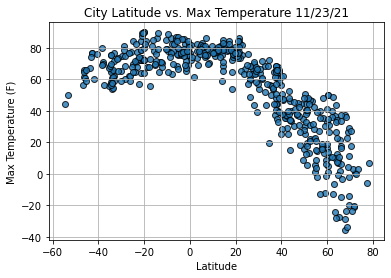

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")
# Show plot.
plt.show()

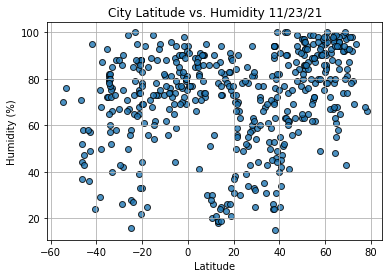

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

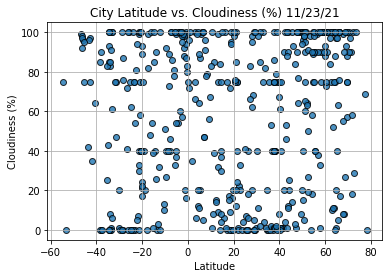

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

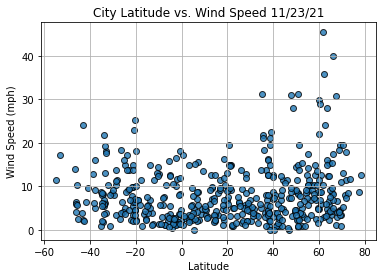

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Linear Regression on Weather Data

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    correlation_coefficient = r_value
    print (f"Correlation coefficient is: {r_value:.3f}")
    print (f"Probability value is: {p_value:.3f}")
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    plt.show()


# Creating DataFrames for Northern and Southern Hemispheres (using equator's Latitude)

In [21]:
index13 = city_data_df.loc[13]
index13

City                   Port Pirie
Country                        AU
Date          2021-11-24 00:23:00
Lat                      -33.1833
Lng                      138.0167
Max Temp                    71.69
Humidity                       66
Cloudiness                    100
Wind Speed                   3.83
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
468     True
469     True
470    False
471     True
472     True
Name: Lat, Length: 473, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-11-24 00:20:24,42.6001,-73.9662,29.26,63,4,1.01
1,Pevek,RU,2021-11-24 00:22:57,69.7008,170.3133,-19.84,98,88,3.42
3,Butaritari,KI,2021-11-24 00:22:57,3.0707,172.7902,82.13,71,100,14.83
6,Buzmeyin,TM,2021-11-24 00:22:58,38.0507,58.2056,44.33,76,40,2.30
7,Los Llanos De Aridane,ES,2021-11-24 00:21:21,28.6585,-17.9182,64.15,81,0,1.99


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

Correlation coefficient is: -0.871
Probability value is: 0.000


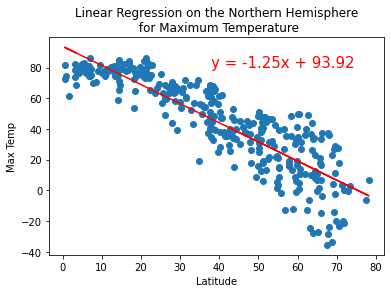

In [25]:
# Linear regression on the Northern Hemisphere for Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere\n for Maximum Temperature''', 'Max Temp',(38,80))

Correlation coefficient is: 0.532
Probability value is: 0.000


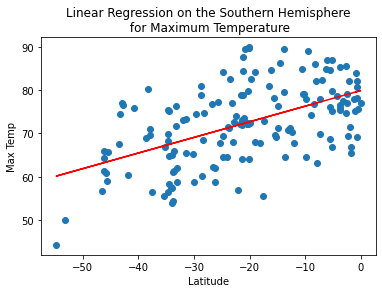

In [26]:
# Linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere\n for Maximum Temperature''', 'Max Temp',(-30,95))

Correlation coefficient is: 0.363
Probability value is: 0.000


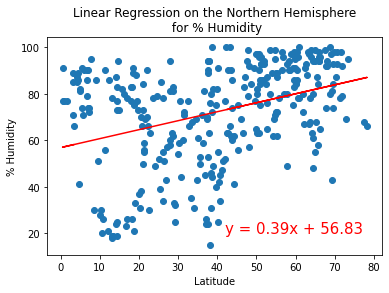

In [27]:
# Linear regression on the Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere\n for % Humidity''','% Humidity',(42,20))


Correlation coefficient is: 0.347
Probability value is: 0.000


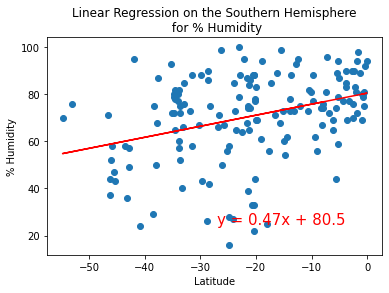

In [28]:
# Linear regression on the Southern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere\n for % Humidity''', '% Humidity',(-27,25))


Correlation coefficient is: 0.222
Probability value is: 0.000


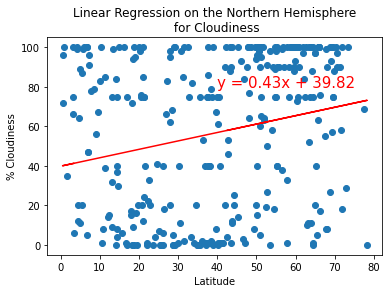

In [29]:
# Linear regression on the Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere\n for Cloudiness''', '% Cloudiness',(40,80))

Correlation coefficient is: 0.141
Probability value is: 0.076


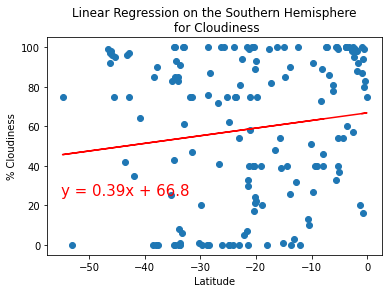

In [30]:
# Linear regression on the Southern Hemisphere for % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere\n for Cloudiness''', '% Cloudiness',(-55,25))

Correlation coefficient is: 0.224
Probability value is: 0.000


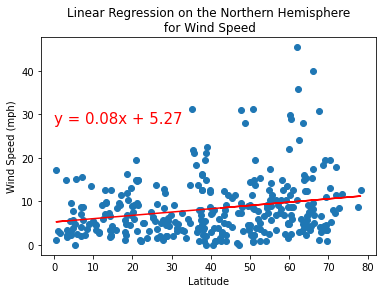

In [31]:
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere\n for Wind Speed''', 'Wind Speed (mph)',(0,28))

Correlation coefficient is: -0.209
Probability value is: 0.008


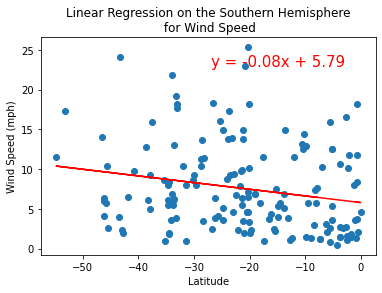

In [32]:
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere\n for Wind Speed''', 'Wind Speed (mph)',(-27,23))